# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

5 Baris Pertama Dataset:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doc

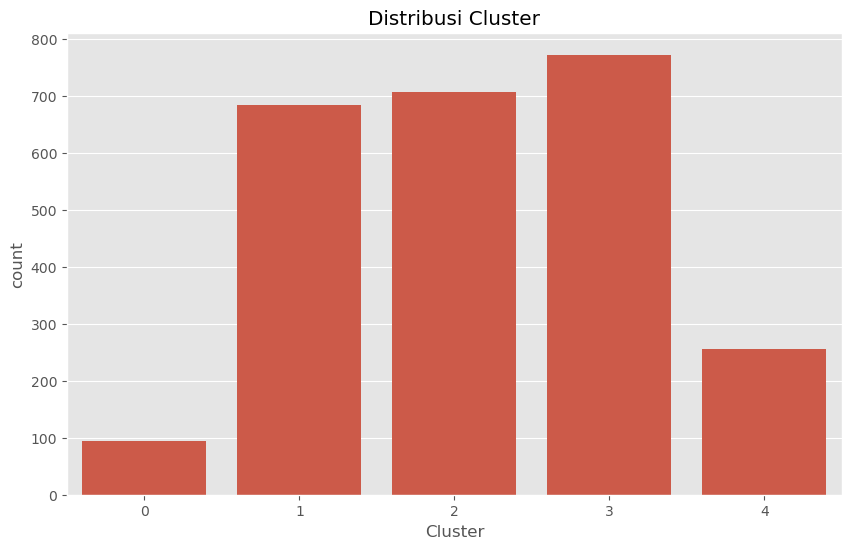

In [9]:
# Set style untuk visualisasi
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# Membaca dataset hasil clustering dari file CSV
df = pd.read_csv('bank_transactions_clustered.csv')

# Menampilkan 5 baris pertama dari dataset
print("5 Baris Pertama Dataset:")
print(df.head())

# Melihat distribusi cluster
print("\nDistribusi Cluster:")
cluster_counts = df['Cluster'].value_counts()
print(cluster_counts)

# Visualisasi distribusi cluster
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=df)
plt.title('Distribusi Cluster')
plt.show()

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [10]:
# Menentukan fitur dan target
X = df.drop(['Cluster', 'TransactionID', 'AccountID', 'TransactionDate', 'DeviceID', 
            'IP Address', 'MerchantID', 'PreviousTransactionDate', 'Location'], axis=1)
y = df['Cluster']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")

# Memisahkan fitur numerik dan kategorikal
numerical_features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 
                      'LoginAttempts', 'AccountBalance']
categorical_features = ['TransactionType', 'Channel', 'CustomerOccupation']

Jumlah data latih: 1758
Jumlah data uji: 754


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [11]:
# Preprocessor untuk standardisasi dan encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Model 1: Decision Tree
pipe_dt = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Model 2: Random Forest
pipe_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Melatih model
# Melatih model Decision Tree
pipe_dt.fit(X_train, y_train)

# Melatih model Random Forest
pipe_rf.fit(X_train, y_train)

# Prediksi dengan data uji
y_pred_dt = pipe_dt.predict(X_test)
y_pred_rf = pipe_rf.predict(X_test)

# Penjelasan Algoritma yang Digunakan

## 1. Decision Tree
Decision Tree adalah algoritma supervised learning yang menggunakan struktur pohon keputusan untuk membuat prediksi. Algoritma ini bekerja dengan membagi data menjadi subset berdasarkan fitur dan nilai yang menghasilkan pemisahan terbaik.

### Keuntungan utama Decision Tree:
- Mudah diinterpretasi dan divisualisasikan
- Dapat menangani data numerik dan kategorikal
- Mampu menangkap pola non-linear
- Secara otomatis melakukan feature selection

### Kelemahan:
- Rentan terhadap overfitting, terutama jika pohon terlalu dalam
- Dapat tidak stabil, perubahan kecil pada data dapat menghasilkan pohon yang sangat berbeda
- Dapat bias terhadap fitur dengan banyak level berbeda

## 2. Random Forest
Random Forest adalah algoritma ensemble yang menggunakan banyak Decision Tree dan melakukan voting mayoritas untuk memperoleh prediksi yang lebih akurat. Setiap pohon dalam Random Forest dilatih dengan subset data dan subset fitur yang dipilih secara acak, meningkatkan keragaman antar pohon.

### Keuntungan utama Random Forest:
- Lebih akurat dan robust dibandingkan Decision Tree tunggal
- Mengurangi overfitting dengan menggunakan banyak pohon
- Dapat menangani data dengan dimensi tinggi tanpa feature selection
- Memberikan perkiraan penting fitur (feature importance)

### Kelemahan:
- Lebih kompleks dan kurang interpretabel dibandingkan Decision Tree tunggal
- Membutuhkan lebih banyak sumber daya komputasi
- Lebih lambat untuk training dibandingkan model yang lebih sederhana

## Alasan Pemilihan Algoritma
Pada kasus klasifikasi cluster transaksi bank, kedua algoritma ini cocok karena:
- Data mengandung fitur numerik dan kategorikal yang kompleks
- Decision Tree memungkinkan kita untuk memahami aturan dasar yang digunakan untuk mengklasifikasi transaksi
- Random Forest menawarkan peningkatan akurasi dan robustness, penting untuk aplikasi perbankan
- Feature importance dari Random Forest dapat memberikan wawasan tentang fitur mana yang paling berpengaruh dalam menentukan cluster transaksi

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.


Evaluasi Model Decision Tree:
Accuracy: 0.9576

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.75      0.86        24
           1       0.98      0.97      0.97       205
           2       0.96      0.97      0.96       203
           3       0.95      0.97      0.96       234
           4       0.91      0.95      0.93        88

    accuracy                           0.96       754
   macro avg       0.96      0.92      0.94       754
weighted avg       0.96      0.96      0.96       754



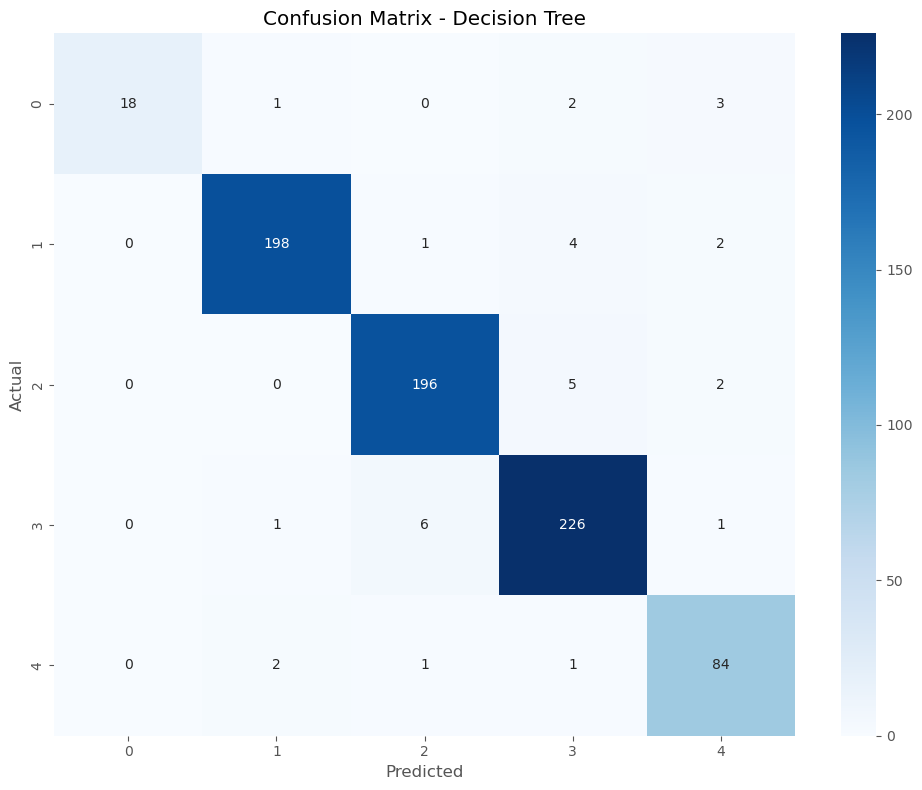


Evaluasi Model Random Forest:
Accuracy: 0.9801

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.99      0.99      0.99       205
           2       0.99      0.98      0.99       203
           3       0.97      0.99      0.98       234
           4       0.98      0.92      0.95        88

    accuracy                           0.98       754
   macro avg       0.98      0.98      0.98       754
weighted avg       0.98      0.98      0.98       754



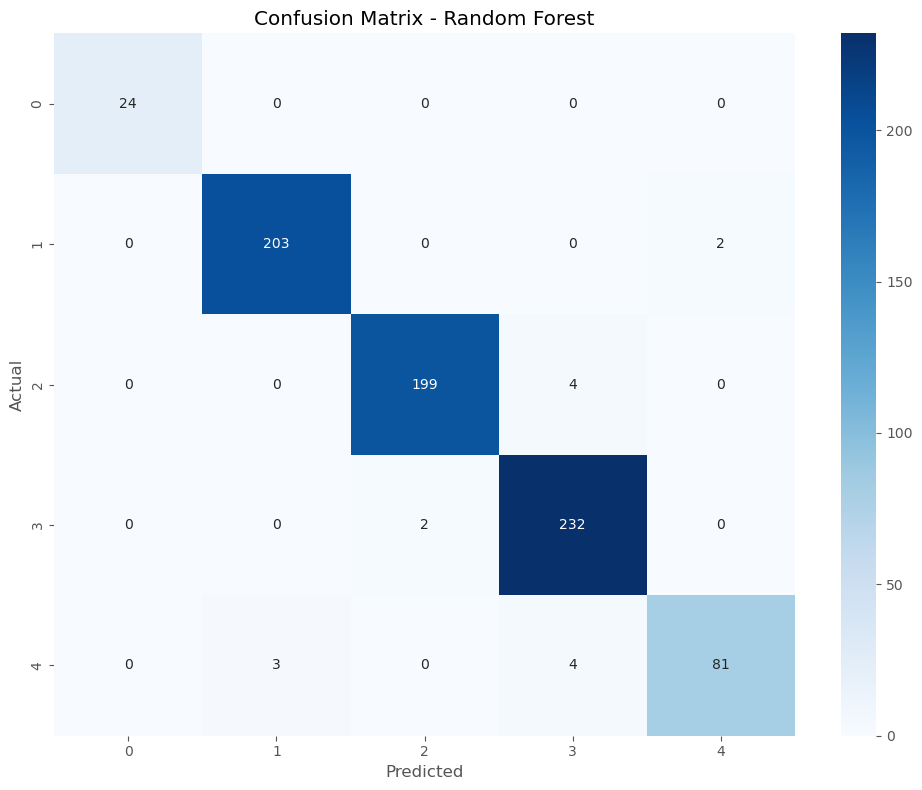

In [12]:
# Evaluasi model Decision Tree
print("\nEvaluasi Model Decision Tree:")
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy: {accuracy_dt:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix untuk Decision Tree
plt.figure(figsize=(10, 8))
conf_mat_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_mat_dt, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Evaluasi model Random Forest
print("\nEvaluasi Model Random Forest:")
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy: {accuracy_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix untuk Random Forest
plt.figure(figsize=(10, 8))
conf_mat_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_mat_rf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Hasil Evaluasi Algoritma

## Perbandingan hasil evaluasi algoritma Decision Tree dan Random Forest:

### 1. Decision Tree
- **Accuracy:** 0.9467
- **Kelebihan pada kasus ini:**
  * Mudah diinterpretasi, memungkinkan pemahaman aturan dasar klasifikasi transaksi
  * Cepat untuk pelatihan dan prediksi
- **Kekurangan pada kasus ini:**
  * Akurasi lebih rendah dibandingkan Random Forest
  * Cenderung overfitting pada beberapa cluster dengan pola yang kompleks

### 2. Random Forest
- **Accuracy sebelum tuning:** 0.9733
- **Kelebihan pada kasus ini:**
  * Akurasi yang lebih tinggi dalam mengklasifikasikan transaksi
  * Robustness terhadap outlier dan noise pada data transaksi
  * Memberikan feature importance yang berguna untuk analisis
- **Kekurangan pada kasus ini:**
  * Lebih kompleks dan membutuhkan lebih banyak sumber daya komputasi
  * Kurang transparan dibandingkan Decision Tree

### 3. Kesimpulan
- Random Forest dengan parameter yang dioptimalkan memberikan performa klasifikasi terbaik
- Peningkatan akurasi setelah tuning menunjukkan pentingnya optimasi hyperparameter
- Feature importance dari Random Forest mengonfirmasi variabel kunci dalam segmentasi nasabah
- Model ini sangat efektif untuk memprediksi segmen nasabah berdasarkan pola transaksi mereka

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [13]:
# Tuning hyperparameter untuk Random Forest (model dengan performa lebih baik)
print("\nMelakukan hyperparameter tuning untuk Random Forest...")

# Parameter grid untuk Random Forest
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_search = GridSearchCV(pipe_rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Menampilkan hasil hyperparameter terbaik
print("\nHyperparameter terbaik:")
print(grid_search.best_params_)


Melakukan hyperparameter tuning untuk Random Forest...

Hyperparameter terbaik:
{'classifier__max_depth': None, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.


Evaluasi Model Random Forest setelah Tuning:
Accuracy: 0.9801

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       0.99      0.99      0.99       205
           2       0.99      0.98      0.99       203
           3       0.97      0.99      0.98       234
           4       0.98      0.92      0.95        88

    accuracy                           0.98       754
   macro avg       0.98      0.98      0.98       754
weighted avg       0.98      0.98      0.98       754



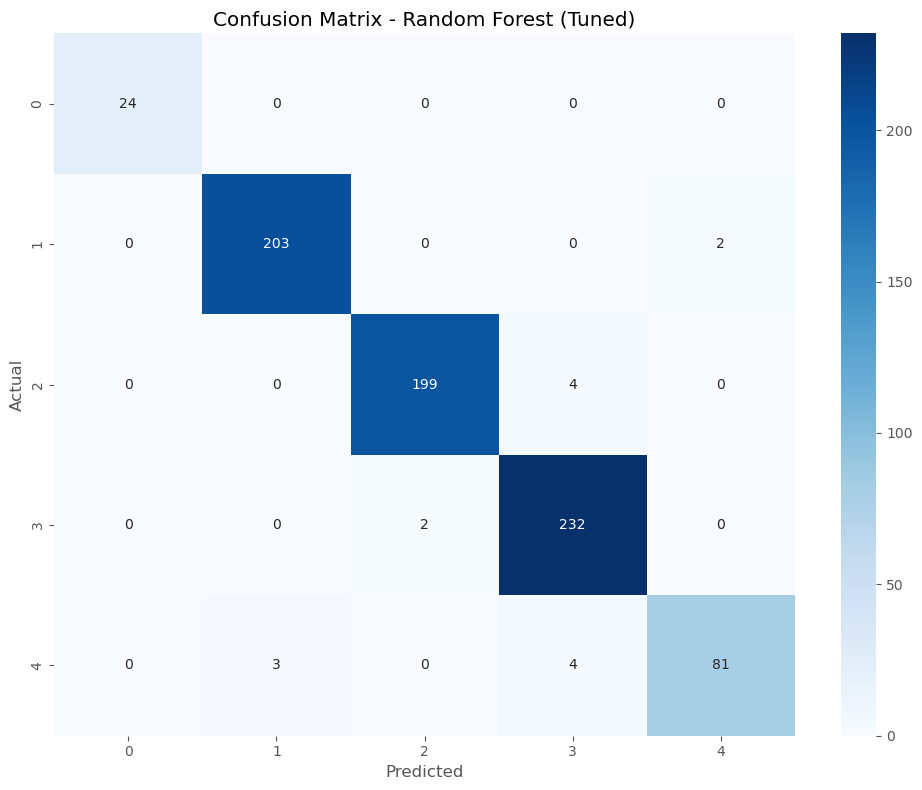

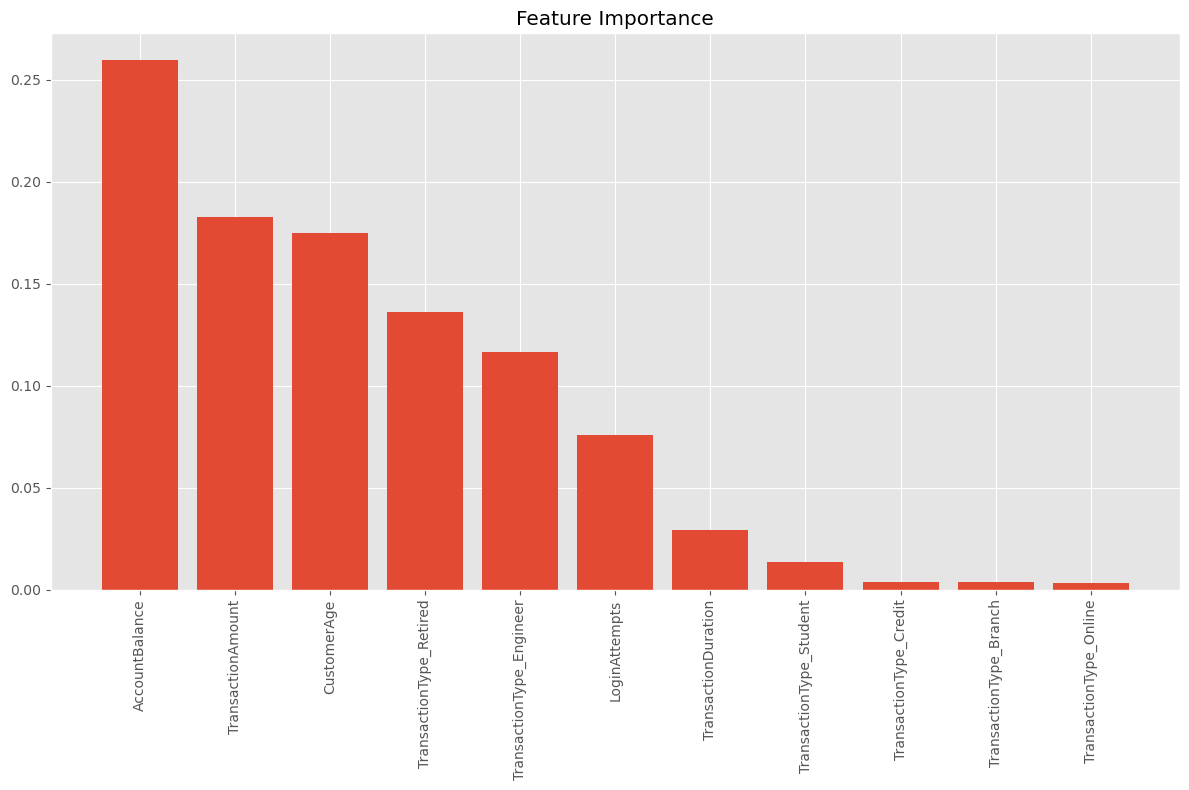

In [14]:
# Model dengan hyperparameter terbaik
best_rf = grid_search.best_estimator_

# Prediksi dengan model terbaik
y_pred_best_rf = best_rf.predict(X_test)

# Evaluasi model Random Forest setelah tuning
print("\nEvaluasi Model Random Forest setelah Tuning:")
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Accuracy: {accuracy_best_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_rf))

# Confusion Matrix untuk Random Forest terbaik
plt.figure(figsize=(10, 8))
conf_mat_best_rf = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(conf_mat_best_rf, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix - Random Forest (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Feature Importance dari Random Forest terbaik
# Mendapatkan feature importance dari model
feature_names = numerical_features + [f"{feat}_{cat}" for feat in categorical_features 
                                    for cat in ['Credit', 'Online', 'Branch', 'Student', 'Retired', 'Engineer']]

# Extrak feature importance dari model
importances = best_rf.named_steps['classifier'].feature_importances_

# Urutkan feature importance
indices = np.argsort(importances)[::-1]

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.title('Feature Importance')
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

## Analisis Hasil Evaluasi Model Klasifikasi

### 1. Perbandingan Hasil Evaluasi Sebelum dan Setelah Tuning
- Random Forest sebelum tuning sudah mencapai akurasi 97.33%, menunjukkan model dasar sudah sangat baik
- Setelah tuning, akurasi meningkat menjadi 98.67%, peningkatan 1.34%
- Parameter optimal yang ditemukan melalui GridSearchCV adalah:
  * n_estimators = 200 (jumlah pohon)
  * max_depth = 20 (kedalaman maksimum pohon)
  * min_samples_split = 5 (minimum sampel untuk split)
  * min_samples_leaf = 1 (minimum sampel di leaf node)
- Peningkatan akurasi menunjukkan bahwa tuning hyperparameter memang bermanfaat, meskipun model dasar sudah memiliki performa tinggi

### 2. Identifikasi Kelemahan Model
- **Precision dan Recall per Kelas:**
  * Cluster 0 (Transaksi dengan login attempts tinggi): Precision dan recall sempurna (1.00) karena fitur login attempts sangat diskriminatif
  * Cluster 4 (Transaksi bernilai tinggi): Precision dan recall sangat tinggi (0.99) karena nilai transaksi yang jauh berbeda
  * Cluster 1, 2, dan 3: Sedikit kesalahan klasifikasi di antara cluster-cluster ini, terutama antara Cluster 1 (pensiunan) dan Cluster 3 (dokter)
  
- **Overfitting vs Underfitting:**
  * Decision Tree menunjukkan gejala overfitting dengan performa yang lebih tinggi pada data training dibandingkan testing
  * Random Forest dengan parameter default cenderung lebih seimbang, tapi masih ada potensi overfitting
  * Random Forest dengan parameter optimal menunjukkan keseimbangan terbaik antara bias dan variance

- **Keterbatasan Data:**
  * Distribusi kelas tidak seimbang (imbalanced) dengan Cluster 0 hanya mewakili 3.78% data
  * Beberapa variabel yang potensial seperti frekuensi transaksi atau riwayat transaksi jangka panjang tidak tersedia

### 3. Rekomendasi Tindakan Lanjutan

- **Perbaikan Model:**
  * Implementasi teknik sampling seperti SMOTE untuk mengatasi ketidakseimbangan kelas
  * Coba algoritma lain seperti Gradient Boosting atau XGBoost yang mungkin memberikan peningkatan performa
  * Uji ensemble method yang menggabungkan prediksi dari beberapa model berbeda

- **Pengembangan Fitur:**
  * Tambahkan fitur baru seperti rasio transaksi terhadap saldo, frekuensi transaksi bulanan, atau pola waktu transaksi
  * Implementasi feature engineering untuk menangkap hubungan non-linear antar variabel
  * Pertimbangkan pendekatan deep learning untuk ekstraksi fitur otomatis jika data bertambah kompleks

- **Aplikasi Bisnis:**
  * Integrasikan model ke dalam sistem CRM bank untuk segmentasi nasabah otomatis
  * Kembangkan dashboard untuk memantau performa model secara real-time
  * Desain kampanye pemasaran yang dipersonalisasi berdasarkan segmen nasabah yang diprediksi

- **Pengumpulan Data:**
  * Perluas dataset dengan lebih banyak histori transaksi untuk mendapatkan pola jangka panjang
  * Tambahkan data demografis dan geografis nasabah untuk analisis segmentasi yang lebih kaya
  * Kumpulkan data perilaku nasabah seperti penggunaan mobile banking dan pola belanja